In [18]:
import ydata_profiling as pp

c:\Users\KDP-27\anaconda3\envs\ML_CV\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import ydata_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [85]:
data= pd.read_csv('./heart.csv')

In [86]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [ ]:
# 1. age
# 2. sex : 0 여성 / 1 남성
# 3. cp : 흉통 유형(4개 값)
# 4. trestbps : 안정시 혈압
# 5. chol : 혈청 콜레스테롤(mg/dl)
# 6. fbs : 공복 혈당 > 120 mg/dl
# 7. restecg : 휴식기 심전도 결과(값 0,1,2)
# 8. thalach : 최대 심박수 달성
# 9. exang : 운동 유발 협심증
# 10. oldpeak : 휴식에 비해 운동으로 유발된 ST 저하
# 11. slope : 피크 운동 ST 분절의 기울기
# 12. ca : 형광염색으로 채색된 주요 혈관 수(0-3)
# 13. thal : 0 = 정상; 1 = 고정 결함; 2 = 가역적 결함
# 14. target


    'age'     : 55,   # 나이
    'sex'     : 1,    # 1=남, 0=여
    'cp'      : 3,    # 흉통 유형 (1~4)
    'trestbps': 140,  # 안정시 혈압
    'chol'    : 250,  # 혈청 콜레스테롤
    'fbs'     : 0,    # 공복 혈당 >120mg/dl 여부(0/1)
    'restecg' : 1,    # 안정시 심전도(0~2)
    'thalach' : 150,  # 최대 심박수
    'exang'   : 0,    # 운동성 협심증(0/1)
    'oldpeak' : 1.2,  # ST 분절 우울도
    'slope'   : 2,    # ST 분절 기울기(1~3)
    'ca'      : 0,    # 혈관 개수(0~3)
    'thal'    : 1     # 혈류장애(0=정상,1=fixed,2=rev)

In [87]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [89]:
pp.ProfileReport(data)


ModuleNotFoundError: No module named 'ipywidgets'

In [90]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [91]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [92]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [93]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ML models

Logistic Regression
Naive Bayes
Random Forest Classifier
Extreme Gradient Boost
K-Nearest Neighbour
Decision Tree
Support Vector Machine

In [96]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model_1 = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [ ]:
# m2 = 'Naive Bayes'
# nb = GaussianNB()
# nb.fit(X_train,y_train)
# nbpred = nb.predict(X_test)
# nb_conf_matrix = confusion_matrix(y_test, nbpred)
# nb_acc_score = accuracy_score(y_test, nbpred)
# print("confussion matrix")
# print(nb_conf_matrix)
# print("\n")
# print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
# print(classification_report(y_test,nbpred))

confussion matrix
[[79 19]
 [11 96]]


Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [98]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=42,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 90   8]
 [  2 105]]


Accuracy of Random Forest: 95.1219512195122 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        98
           1       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [99]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 84  14]
 [  6 101]]


Accuracy of Extreme Gradient Boost: 90.2439024390244 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        98
           1       0.88      0.94      0.91       107

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [100]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [101]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [ ]:
# m7 = 'Support Vector Classifier'
# svc =  SVC(kernel='rbf', C=2)
# svc.fit(X_train, y_train)
# svc_predicted = svc.predict(X_test)
# svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
# svc_acc_score = accuracy_score(y_test, svc_predicted)
# print("confussion matrix")
# print(svc_conf_matrix)
# print("\n")
# print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
# print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [124]:
import koreanize_matplotlib

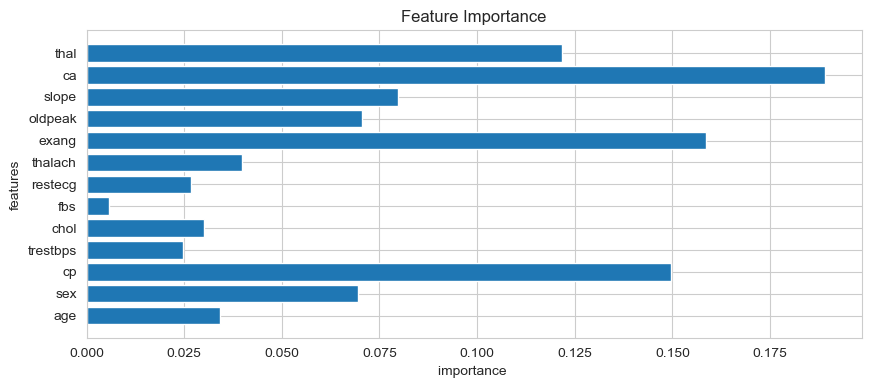

In [131]:

imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Feature Importance")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

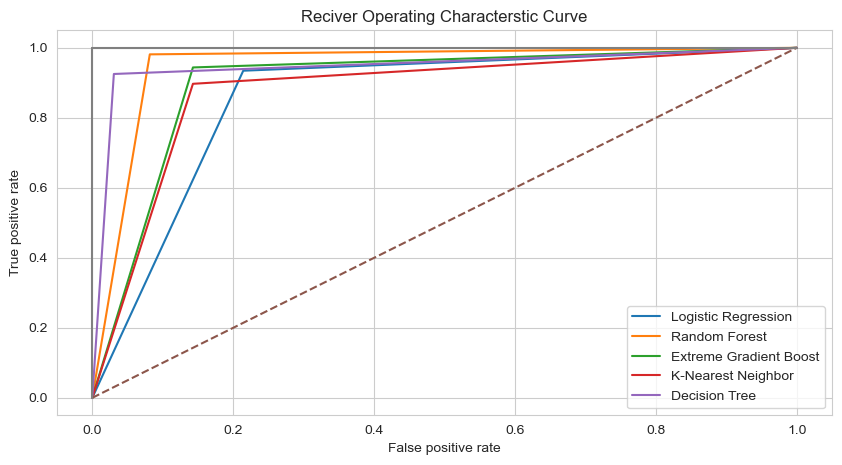

In [122]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
#plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
#plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [120]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree'], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.341463
1,Random Forest,95.121951
2,Extreme Gradient Boost,90.243902
3,K-Nearest Neighbour,87.804878
4,Decision Tree,94.634146


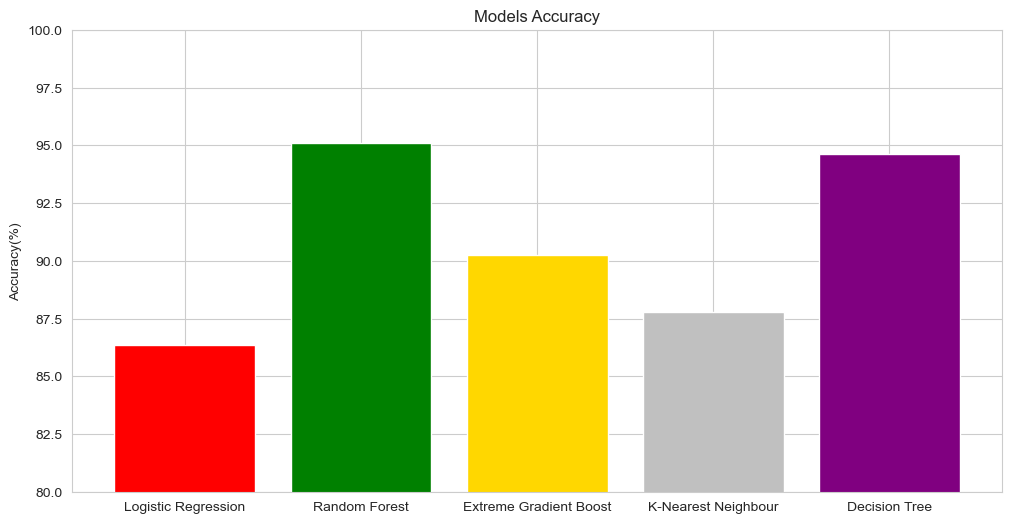

In [129]:
import koreanize_matplotlib

colors = ['red','green','gold','silver','purple','orange',]
plt.figure(figsize=(12,6))
plt.title("Models Accuracy")

plt.ylabel("Accuracy(%)")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.ylim(80, 100)
plt.show()

### 머신러닝 학습 모델 저장

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import joblib

In [47]:
joblib.dump(model_1, 'heart_model_1.pkl')

['heart_model_1.pkl']

In [49]:
joblib.dump(svc, 'heart_model_svc.pkl')

['heart_model_svc.pkl']

### 이진분류 -> 확률

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, \
                            accuracy_score, \
                            classification_report, \
                            roc_auc_score

In [63]:
# 1) probability=True 옵션 추가
svc = SVC(kernel='rbf', C=2, probability=True)

# 2) 학습
svc.fit(X_train, y_train)

# 3) 확률 예측 (각 샘플이 클래스 0 또는 1일 확률)
svc_proba = svc.predict_proba(X_test)  
# svc_proba.shape == (n_samples, 2)
# svc_proba[:, 0] = 클래스 0일 확률, svc_proba[:, 1] = 클래스 1일 확률

In [64]:
# 4) 확률을 이진 예측 값으로 변환 (threshold=0.5)
svc_predicted = (svc_proba[:, 1] >= 0.5).astype(int)

# 5) 평가
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score    = accuracy_score(y_test, svc_predicted)
svc_auc          = roc_auc_score(y_test, svc_proba[:, 1])

In [60]:
print("Confusion Matrix:")
print(svc_conf_matrix, "\n")

print(f"Accuracy: {svc_acc_score*100:.2f}%")
print(f"AUC-ROC : {svc_auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, svc_predicted))

Confusion Matrix:
[[ 94   4]
 [  0 107]] 

Accuracy: 98.05%
AUC-ROC : 0.9985

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [65]:
joblib.dump(svc, 'heart_model_svc2.pkl')

['heart_model_svc2.pkl']

In [81]:
import pandas as pd
import joblib
from sklearn.svm import SVC

# 1) 모델 로드 (probability=True 로 학습된 SVC)
svc: SVC = joblib.load('heart_model_svc2.pkl')  
# ※ 모델을 저장하실 때 probability=True 옵션으로 학습된 모델을 사용하세요.

# 2) 임의의 샘플 값 정의
#    아래 딕셔너리의 키는 학습에 사용된 피처명과 동일해야 합니다.
sample = {
    'age'     : 5,   # 나이
    'sex'     : 1,    # 1=남, 0=여
    'cp'      : 3,    # 흉통 유형 (1~4)
    'trestbps': 1410,  # 안정시 혈압
    'chol'    : 250,  # 혈청 콜레스테롤
    'fbs'     : 0,    # 공복 혈당 >120mg/dl 여부(0/1)
    'restecg' : 1,    # 안정시 심전도(0~2)
    'thalach' : 150,  # 최대 심박수
    'exang'   : 0,    # 운동성 협심증(0/1)
    'oldpeak' : 1.2,  # ST 분절 우울도
    'slope'   : 2,    # ST 분절 기울기(1~3)
    'ca'      : 0,    # 혈관 개수(0~3)
    'thal'    : 1     # 혈류장애(0=정상,1=fixed,2=rev)
}

# 3) DataFrame으로 변환
sample_df = pd.DataFrame([sample])

# 4) 확률 예측
proba = svc.predict_proba(sample_df)[0, 1]  
#   → [0]번째 샘플, 클래스1(심장병) 일 확률

# 5) 이진 예측 (threshold=0.5)
pred = int(proba >= 0.5)

# 6) 결과 출력
print(f"샘플 입력값:\n{sample_df.to_dict(orient='records')[0]}\n")
print(f"심장병(1) 확률: {proba*100:.2f}%")
print(f"이진 예측 결과: {'심장병 의심' if pred==1 else '정상'}")

샘플 입력값:
{'age': 5, 'sex': 1, 'cp': 3, 'trestbps': 1410, 'chol': 250, 'fbs': 0, 'restecg': 1, 'thalach': 150, 'exang': 0, 'oldpeak': 1.2, 'slope': 2, 'ca': 0, 'thal': 1}

심장병(1) 확률: 55.52%
이진 예측 결과: 심장병 의심


c:\Users\KDP-27\anaconda3\envs\ML_CV\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [67]:
import pandas as pd
# 학습 스크립트 끝 부분에 추가
df = pd.read_csv('./heart.csv')
default_vals = df.drop(columns=['target']).median()  
pd.to_pickle(default_vals, 'default_values.pkl')


In [75]:
print("Input data for prediction:", df.to_dict(orient='records')[5])


Input data for prediction: {'age': 58, 'sex': 0, 'cp': 0, 'trestbps': 100, 'chol': 248, 'fbs': 0, 'restecg': 0, 'thalach': 122, 'exang': 0, 'oldpeak': 1.0, 'slope': 1, 'ca': 0, 'thal': 2, 'target': 1}
